In [1]:
import matplotlib

In [5]:
import pydicom
import numpy as np
import os 
import dicom_numpy
from importlib import reload
from pathlib import Path


In [6]:
if os.name == 'posix':
    root = r'C:\Users\Eier\Documents\ct'
else:
    root = r'/Users/Hallsteins/Documents/ct'

data_path = os.path.join(root, r'PA000000/ST000001/SE000004')

'posix'

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]

In [5]:
dicom_numpy.__file__

'C:\\appl\\custom\\anaconda_3\\lib\\site-packages\\dicom_numpy\\__init__.py'

In [6]:
# data_path = r'/Users/Hallsteins/Documents/ct/dicom_2017_03_09_0810_0000FADC/AA75D963/AA9D5442/0000B54A' # EE0B50C1d


In [7]:
# image = pydicom.read_file(data_path + '/' + 'EE0B50C1')

In [8]:
# image.SliceThickness

In [9]:
files = [data_path + '/' + s for s in os.listdir(data_path)
        if s.startswith('IM')]

In [10]:
def extract_voxel_data(list_of_files):
    datasets = [pydicom.read_file(f) for f in list_of_files]
    # print(datasets[0])
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        # invalid DICOM data
        raise
    return voxel_ndarray, ijk_to_xyz
            

In [11]:
datasets = [pydicom.read_file(f) for f in files]  #os.listdir(files)]

In [12]:
'''for f in files[1:]:
    print(f)
    image = pydicom.dcmread(f)
    # print(image.PixelData.rows)'''

'for f in files[1:]:\n    print(f)\n    image = pydicom.dcmread(f)\n    # print(image.PixelData.rows)'

In [13]:
# datasets[0]

In [14]:
reload(dicom_numpy)

<module 'dicom_numpy' from 'C:\\appl\\custom\\anaconda_3\\lib\\site-packages\\dicom_numpy\\__init__.py'>

In [15]:
vox, ijk = extract_voxel_data(files)

The slice spacing is non-uniform. Slice spacings:
[ 0.6699365  0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.669996   0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.6700005  0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
  0.67       0.67       0.67       0.67       0.67       0.67       0.67
 

In [16]:
vox

array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [  226.,   146.,    83., ...,    30.,   176.,   175.],
        [  491.,   152.,   120., ...,   251.,   -60.,   161.],
        ..., 
        [ -109.,   178.,   -62., ...,   -56.,   367.,  -554.],
        [   18.,   176.,    51., ...,   -79.,   314.,  -370.],
        [   64.,   245.,    60., ...,   -47.,   230.,  -101.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [  162.,    -4.,   170., ...,    -3.,    -7.,   345.],
        [  396.,    88.,   124., ...,   212.,  -193.,   352.],
        ..., 
        [  -18.,  -181.,    20., ...,  -205.,   457.,  -236.],
        [   29.,  -156.,    64., ...,  -287.,   433.,   -92.],
        [   86.,   -35.,    92., ...,  -245.,   367.,    38.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [ -117.,   -83.,   172., ...,   -14.,   -89.,   313.],
        [   14.,    75.,   147., ...,    81.,  -100.,   328.],
        ..., 
        [

In [17]:
vox[:][:][1].view()

array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [  162.,    -4.,   170., ...,    -3.,    -7.,   345.],
       [  396.,    88.,   124., ...,   212.,  -193.,   352.],
       ..., 
       [  -18.,  -181.,    20., ...,  -205.,   457.,  -236.],
       [   29.,  -156.,    64., ...,  -287.,   433.,   -92.],
       [   86.,   -35.,    92., ...,  -245.,   367.,    38.]], dtype=float32)

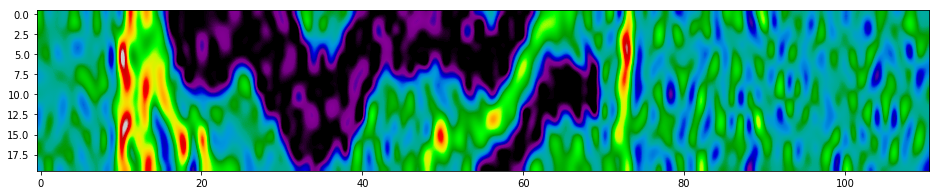

In [21]:
fig, ax = plt.subplots()
ax.imshow(vox[50:70,50,:], interpolation='lanczos', cmap='nipy_spectral')
# fig.canvas.mpl_connect('key_press_event', process_key)


In [22]:
# plt.imshow(vox[:][:][10], interpolation='nearest', aspect=100/700)

In [23]:
def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])  #,aspect=)
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'a':
        previous_slice(ax)
    elif event.key == 'z':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

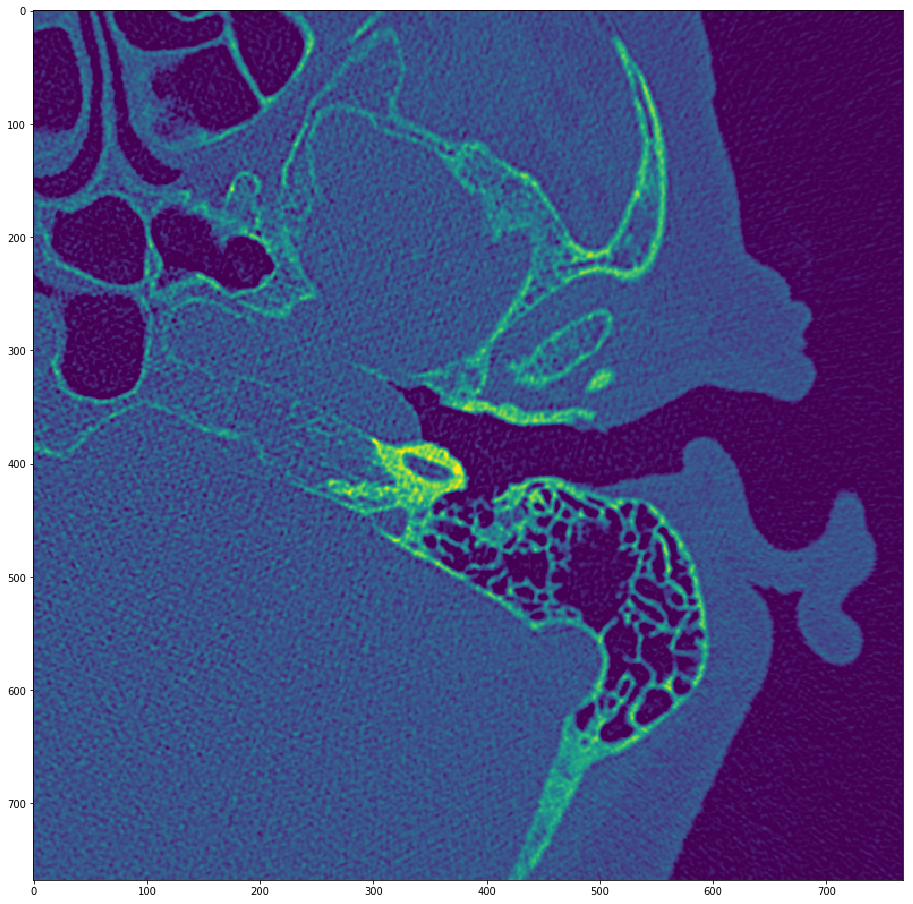

In [24]:
# plt.ion()
multi_slice_viewer(vox.T)

In [25]:
def load_scan(path):
    slices = files # [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    # slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices


def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)
    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    # Convert to Hounsfield units (HU)
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    if slope != 1:
        image = slope * image.astype(np.float64)
    image = image.astype(np.int16)
    image += np.int16(intercept)
    return np.array(image, dtype=np.int16)


In [26]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [27]:
def multi_slice_viewer(volume,idx):
    #remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index=idx
    # ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    #fig.canvas.mpl_connect('key_press_event', process_key)

'''def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])'''

"def process_key(event):\n    fig = event.canvas.figure\n    ax = fig.axes[0]\n    if event.key == 'j':\n        previous_slice(ax)\n    elif event.key == 'k':\n        next_slice(ax)\n    fig.canvas.draw()\n\ndef previous_slice(ax):\n    volume = ax.volume\n    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %\n    ax.images[0].set_array(volume[ax.index])\n\ndef next_slice(ax):\n    volume = ax.volume\n    ax.index = (ax.index + 1) % volume.shape[0]\n    ax.images[0].set_array(volume[ax.index])"

# 

In [28]:
9//2

4

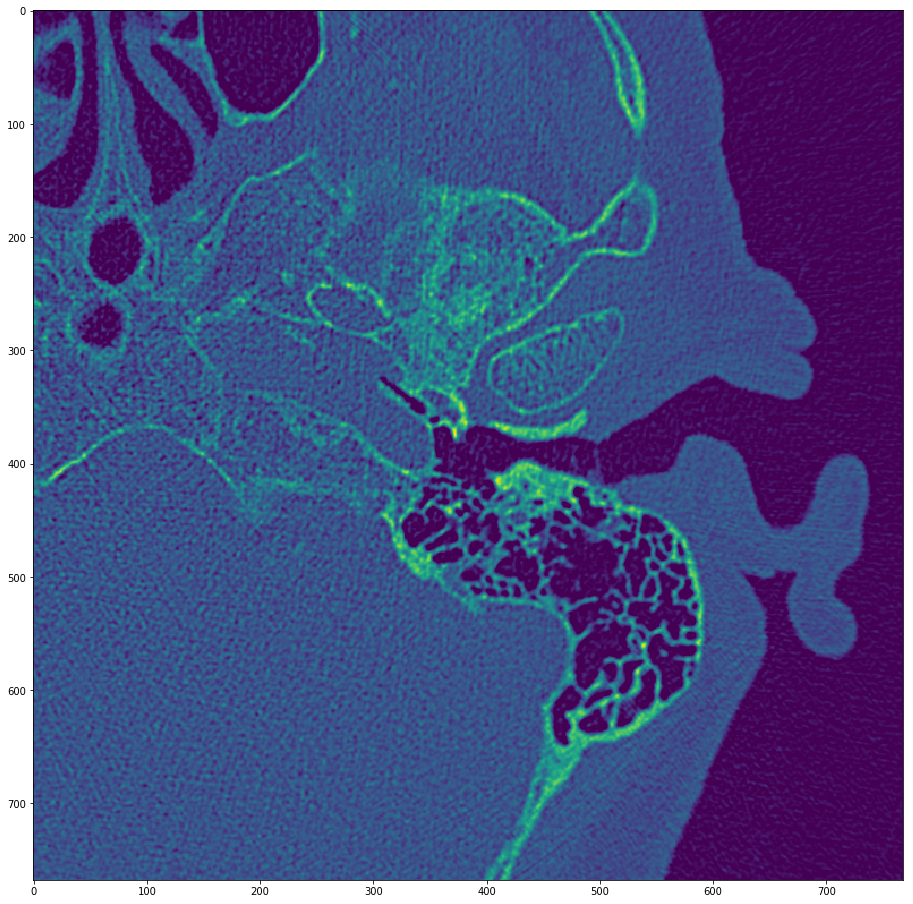

In [29]:
multi_slice_viewer(vox.T,idx=50)

In [30]:
from ipywidgets import interact, widgets, interactive
import segyio

In [31]:
spec = segyio.spec()
filename = 'name_of_your_file.sgy'

spec = segyio.spec()
file_out = 'test1.sgy'

spec.sorting = 2
spec.format = 1
spec.samples = np.arange(30)
spec.ilines = np.arange(10)
spec.xlines = np.arange(20)

In [32]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [33]:
np.zeros(
    (len(spec.xlines), spec.samples), dtype=int) # + ilno #single 

TypeError: only integer scalar arrays can be converted to a scalar index

In [34]:



with segyio.create(filename, spec) as f:

    # write the line itself to the file and the inline number in all this line's headers
    for ilno in spec.ilines:
        f.iline[ilno] = np.zeros(
            [len(spec.xlines), spec.samples], dtype=np.single) + ilno #single 
        print(f.inline[ilno])
        f.header.iline[ilno] = {
            segyio.TraceField.INLINE_3D: ilno,
            segyio.TraceField.offset: 0
        }

    # then do the same for xlines
    for xlno in spec.xlines:
        f.header.xline[xlno] = {
            segyio.TraceField.CROSSLINE_3D: xlno,
            segyio.TraceField.TRACE_SAMPLE_INTERVAL: 4000
        }

TypeError: only integer scalar arrays can be converted to a scalar index

In [37]:
spec.sorting.__doc__

"int(x=0) -> integer\nint(x, base=10) -> integer\n\nConvert a number or string to an integer, or return 0 if no arguments\nare given.  If x is a number, return x.__int__().  For floating point\nnumbers, this truncates towards zero.\n\nIf x is not a number or if base is given, then x must be a string,\nbytes, or bytearray instance representing an integer literal in the\ngiven base.  The literal can be preceded by '+' or '-' and be surrounded\nby whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.\nBase 0 means to interpret the base from the string as an integer literal.\n>>> int('0b100', base=0)\n4"

In [38]:
np.arange(vox.shape[2])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110])

# 

In [40]:
vox2 = vox.T
vox2.shape

(111, 768, 768)

In [41]:
# vox2[:,ilno,:].shape
vox2.shape[0]

111

In [134]:
vox2 = vox.copy() # 
# vox2 = [50:70,50:70:,:]

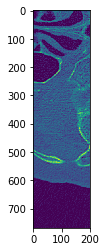

In [151]:
plt.imshow(vox[:,:200,50])

In [256]:
vox.shape

(768, 768, 111)

In [37]:
spec = segyio.spec()
ct_dir = Path(root)
filename = ct_dir / 'ct_left_ax.sgy'

spec.sorting = 2
# spec.format = 1
spec.format = 1
'''spec.samples = np.arange(vox2.shape[2])
spec.ilines = np.arange(vox2.shape[0])
spec.xlines = np.arange(vox2.shape[1])
spec.samples = np.arange(vox.shape[0])
spec.ilines = np.arange(vox.shape[2])
spec.xlines = np.arange(vox.shape[1])'''
spec.samples = np.arange(vox.shape[2])
spec.ilines = np.arange(vox.shape[0])
spec.xlines = np.arange(vox.shape[1])


In [ ]:
with segyio.create(filename, spec) as f:

    # write the line itself to the file and the inline number in all this line's headers
    for ilno in spec.ilines:
        
        f.iline[ilno] = vox[ilno,:,:]
        #print(f.iline[ilno])
        f.header.iline[ilno] = {
            segyio.TraceField.INLINE_3D: ilno,
            segyio.TraceField.offset: 0,  # 0.67
            segyio.TraceField.CDP_X: ilno
        }

    # then do the same for xlines
    for xlno in spec.xlines:
        f.header.xline[xlno] = {
            segyio.TraceField.CROSSLINE_3D: xlno,
            segyio.TraceField.TRACE_SAMPLE_INTERVAL: 1,
            segyio.TraceField.CDP_Y: xlno
        }

In [ ]:
interactive_plot = interactive(multi_slice_viewer(vox.T,idx=90))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [ ]:
multi_slice_viewer(vox.T)

In [ ]:
interact(multi_slice_viewer(vox.T),size=(1,10))

In [ ]:
id=0
patient = load_scan(data_path)

In [ ]:
first_img = patient[0].pixel_array

In [ ]:
plt.imshow(first_img, interpolation='nearest')

In [ ]:
imgs = get_pixels_hu(patient)